# Import modules for cleansing data

In [22]:
import re
import pandas as pd
import numpy as np
from Packages.DataPreperation import CleanData
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob as txt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from datetime import time
from nltk.tokenize import RegexpTokenizer
from sklearn import svm
from keras.models import Sequential
from keras import layers
from keras.layers import LSTM
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
from keras import regularizers
import matplotlib.pyplot as plt

# Read Data

In [12]:
sentimentData = pd.read_csv(r"Data\twitter_training.csv", header=None)
sentimentData.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


# Test for the distribution of results

In [13]:
Sentiment2 = sentimentData
Sentiment2[2].loc[(Sentiment2[2] == "positive")] = 1
Sentiment2[2].loc[(Sentiment2[2] == "negative")] = 0
Sentiment2 = Sentiment2[~Sentiment2[2].str.contains("Neutral")]
Sentiment2 = Sentiment2[~Sentiment2[2].str.contains("Irrelevant")]

Sentiment2[2].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Negative    22542
Positive    20832
Name: 2, dtype: int64

<AxesSubplot:>

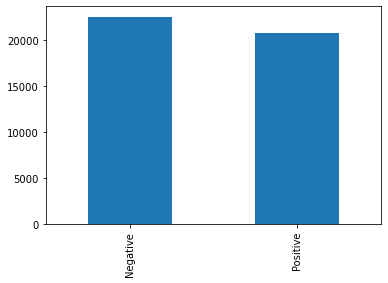

In [14]:
Sentiment2[2].value_counts().plot.bar()


In [15]:
perform = CleanData()

removeEmojis = True
CleanText = True
removeStopWords = True
lemmatizeText = True
POSLemmatizeTextFor = False
Stemtextfor = False
textcol = 3

if CleanText == True:
    Sentiment2 = perform.GeneralCleansingFor(Sentiment2, textcol)
if removeEmojis == True:
    Sentiment2 = perform.RemoveEmoticonsFor(Sentiment2)
if removeStopWords == True:
    Sentiment2 = perform.RemoveStopWordsFor(Sentiment2)
if lemmatizeText == True:
    Sentiment2 = perform.LemmatizeTextFor(Sentiment2)
if POSLemmatizeTextFor == True:
    Sentiment2 = perform.POSLemmatizeTextFor(Sentiment2)
if Stemtextfor == True:
    Sentiment2 = perform.StemTextFor(Sentiment2)

Data cleansing initialised.


# Perform tokenisation and create test set

In [16]:
token = RegexpTokenizer(r"[a-zA-Z0-9]+")
cv = CountVectorizer(stop_words="english",ngram_range=(1,1),tokenizer=token.tokenize)
text_counts = cv.fit_transform(Sentiment2["newReview"])
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, Sentiment2[2], test_size=0.25, random_state=5)

In [ ]:
Sentiment2.head(10)

# Naive Bayes

In [7]:
MNB = MultinomialNB()
MNB.fit(X_train,Y_train)
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("accuracy: " + str('{:4.2f}'.format(accuracy_score*100))+'%')

macro_precision = (metrics.precision_score(Y_test, predicted, average='macro'))
macro_precision = (round(macro_precision,2))*100
print("precision: " + str(macro_precision))

macro_recall = (metrics.recall_score(Y_test, predicted, average='macro'))
macro_recall = (round(macro_recall,2))*100
print("recall: " + str(macro_recall))

macro_f1 = (metrics.f1_score(Y_test, predicted, average='macro'))
macro_f1 = (round(macro_f1,2))*100
print("F1: " + str(macro_f1))

conf_mat = confusion_matrix(Y_test, predicted)
print("confusion matrix: \n" + str(conf_mat))


accuracy: 87.54%
precision: 88.0
recall: 87.0
F1: 88.0
confusion matrix: 
[[5027  596]
 [ 755 4466]]


# Logistic Regression

In [6]:
lr = LogisticRegression(solver = 'liblinear', random_state = 42, max_iter=1000)
lr.fit(X_train,Y_train)
lg_pred = lr.predict(X_test)
print("Accuracy: ",round((metrics.accuracy_score(Y_test,lg_pred))*100,3),"%")

macro_precision = (metrics.precision_score(Y_test, lg_pred, average='macro'))
macro_precision = (round(macro_precision,2))*100
print(macro_precision)

macro_recall = (metrics.recall_score(Y_test, lg_pred, average='macro'))
macro_recall = (round(macro_recall,2))*100
print(macro_recall)

macro_f1 = (metrics.f1_score(Y_test, lg_pred, average='macro'))
macro_f1 = (round(macro_f1,2))*100
print(macro_f1)

conf_mat = confusion_matrix(Y_test, lg_pred)
print(conf_mat)

Accuracy:  88.952 %
89.0
89.0
89.0
[[4959  664]
 [ 534 4687]]


# KNN

try wordvec2

In [7]:
acc_list = []
prec_list = []
rec_list = []
f1_list = []
for k in range(1,10):

    classifier = KNeighborsClassifier(n_neighbors=k,algorithm='brute') #Using brute-force algorithm for quicker computation.
    classifier.fit(X_train, Y_train) #Fitting the built-in sklearn classifier on our training data
    predicted_label = classifier.predict(X_test) #Making the classifier to predict on the previously unseen test data.

    accuracy_score = (metrics.accuracy_score(Y_test,predicted_label))
    accuracy_score = (round(accuracy_score,2))*100
    acc_list.append(accuracy_score)

    confusion_mat = confusion_matrix(Y_test, predicted_label)
    class_report = classification_report(Y_test, predicted_label)

    macro_precision = (metrics.precision_score(Y_test, predicted_label, average='macro'))
    macro_precision = (round(macro_precision,2))*100
    prec_list.append(macro_precision)

    macro_recall = (metrics.recall_score(Y_test, predicted_label, average='macro'))
    macro_recall = (round(macro_recall,2))*100
    rec_list.append(macro_recall)
    
    macro_f1 = (metrics.f1_score(Y_test, predicted_label, average='macro'))
    macro_f1 = (round(macro_f1,2))*100
    f1_list.append(macro_f1)

    print("\n\nConfusion Matrix for k = {} is:\n".format(k))
    print(confusion_mat)
    print("\nClassification Report for k = {} is:\n".format(k))
    print(class_report)



Confusion Matrix for k = 1 is:

[[5198  425]
 [ 240 4981]]

Classification Report for k = 1 is:

              precision    recall  f1-score   support

    Negative       0.96      0.92      0.94      5623
    Positive       0.92      0.95      0.94      5221

    accuracy                           0.94     10844
   macro avg       0.94      0.94      0.94     10844
weighted avg       0.94      0.94      0.94     10844



Confusion Matrix for k = 2 is:

[[5300  323]
 [ 481 4740]]

Classification Report for k = 2 is:

              precision    recall  f1-score   support

    Negative       0.92      0.94      0.93      5623
    Positive       0.94      0.91      0.92      5221

    accuracy                           0.93     10844
   macro avg       0.93      0.93      0.93     10844
weighted avg       0.93      0.93      0.93     10844



Confusion Matrix for k = 3 is:

[[5029  594]
 [ 272 4949]]

Classification Report for k = 3 is:

              precision    recall  f1-score   sup

# SVM

In [8]:
svmModel = svm.SVC(kernel='linear')

svmModel.fit(X_train, Y_train)

svmPred = svmModel.predict(X_test)

print(classification_report(Y_test, svmPred))

Accuracy: 0.9014201401696791


# RNN

In [33]:
from keras.preprocessing import sequence
maxWords = 500

X_train = sequence.pad_sequences(X_train, maxlen=maxWords)
X_test = sequence.pad_sequences(X_test, maxlen=maxWords)

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]